## Importthe data & libraries 

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
nltk.download('stopwords')
from wordcloud import WordCloud
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix


# Load the complete data
data_path = "/Users/sk/Downloads/ML & DL Assignment/15. Capstone Case Study - NLP- Woman Clothing E-Commerce Platform/Womens Clothing Reviews Data.xlsx"
df = pd.read_excel(data_path)


[nltk_data] Downloading package stopwords to /Users/sk/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# Exploratory Data Analysis (EDA)

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23486 entries, 0 to 23485
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Product ID      23486 non-null  int64 
 1   Category        23472 non-null  object
 2   Subcategory1    23472 non-null  object
 3   SubCategory2    23472 non-null  object
 4   Location        23486 non-null  object
 5   Channel         23486 non-null  object
 6   Customer Age    23486 non-null  int64 
 7   Review Title    19676 non-null  object
 8   Review Text     23486 non-null  object
 9   Rating          23486 non-null  int64 
 10  Recommend Flag  23486 non-null  int64 
 11  Sentiment       23486 non-null  object
dtypes: int64(4), object(8)
memory usage: 2.2+ MB
None

Summary Statistics:
         Product ID  Customer Age        Rating  Recommend Flag
count  23486.000000  23486.000000  23486.000000    23486.000000
mean     918.118709     43.198544      4.196032   

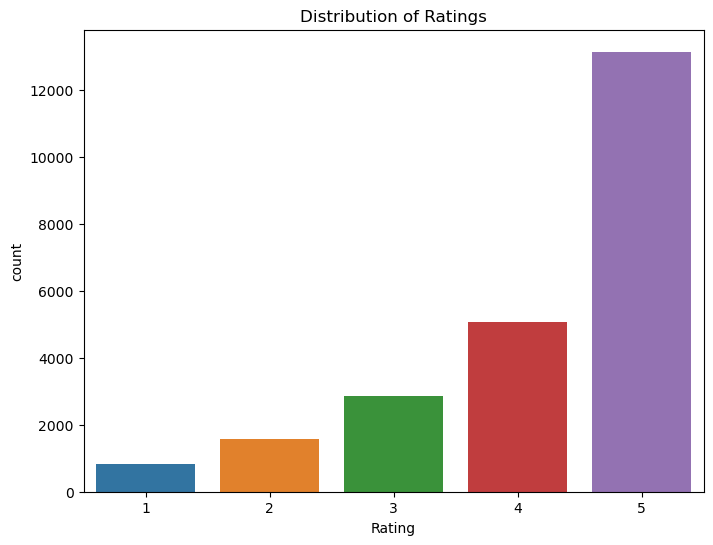

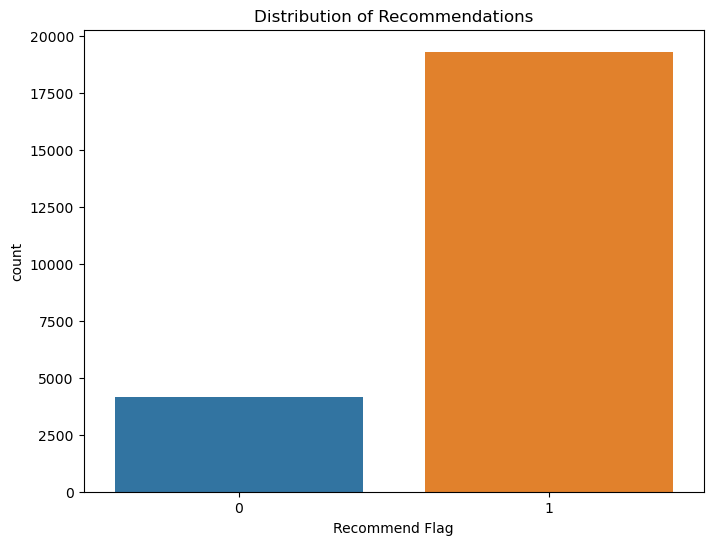

In [16]:
# Exploratory Data Analysis (EDA)
# Display basic information about the dataset
print("Dataset Information:")
print(df.info())

# Display summary statistics
print("\nSummary Statistics:")
print(df.describe())

# Visualize the distribution of Ratings
plt.figure(figsize=(8, 6))
sns.countplot(x='Rating', data=df)
plt.title('Distribution of Ratings')
plt.show()

# Visualize the distribution of Recommended and Not Recommended
plt.figure(figsize=(8, 6))
sns.countplot(x='Recommend Flag', data=df)
plt.title('Distribution of Recommendations')
plt.show()


# Text Mining & Visualisation ( Word Cloud)


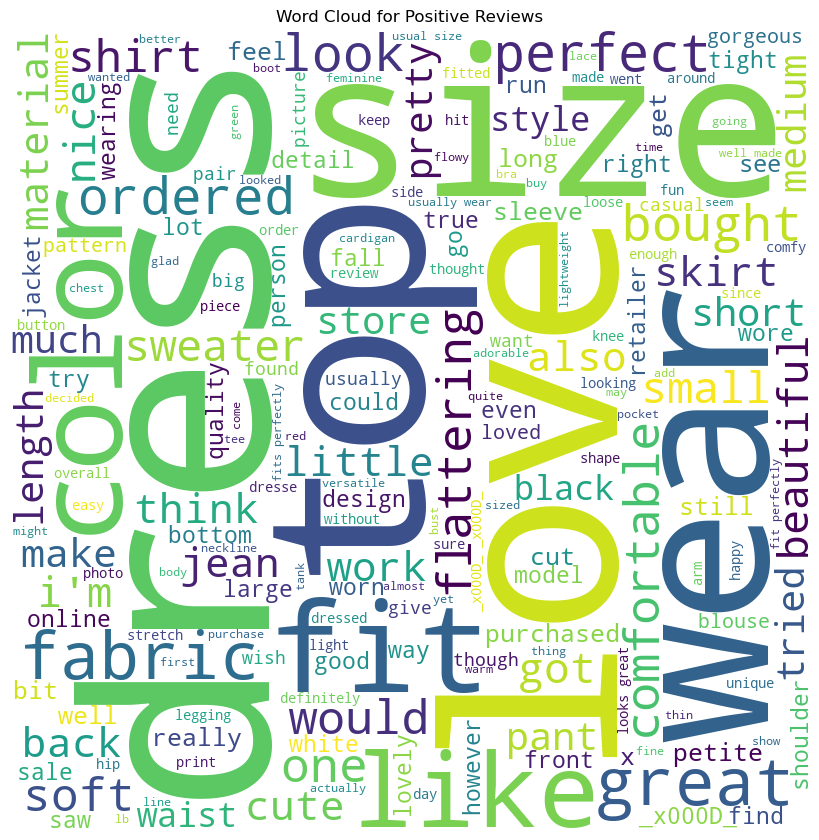

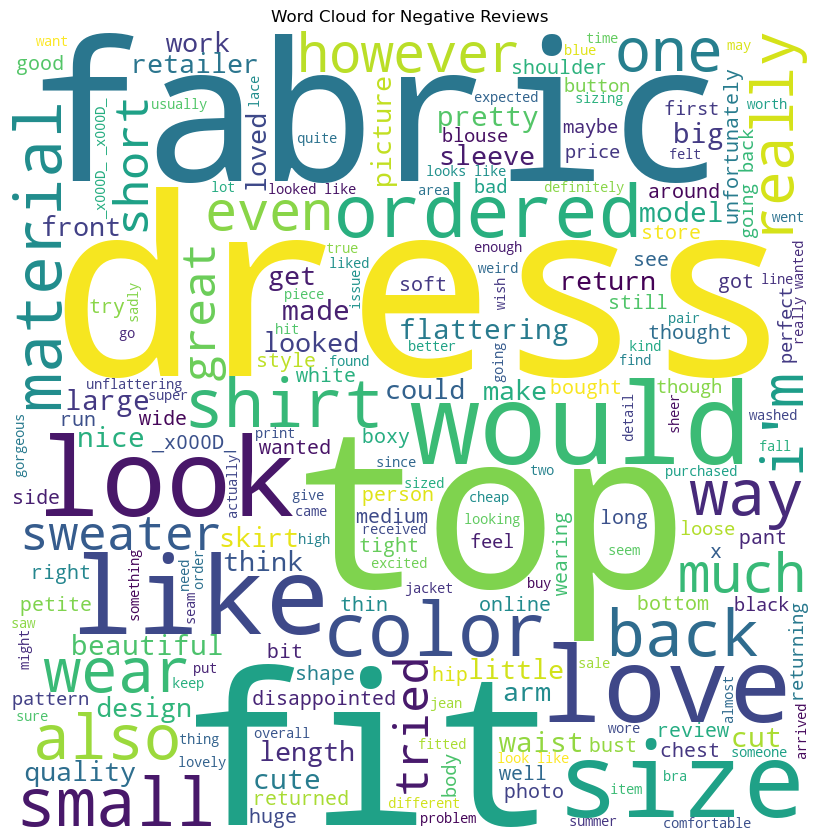

In [17]:
# Handle missing values in 'Review Text'
df['Review Text'].fillna('', inplace=True)

# Word Cloud for Positive Reviews
positive_reviews = " ".join(df[df['Rating'] >= 4]['Review Text'].astype(str))
wordcloud_positive = WordCloud(width=800, height=800,
                               background_color='white',
                               stopwords=stopwords.words('english'),
                               min_font_size=10).generate(positive_reviews)

plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud_positive)
plt.axis("off")
plt.tight_layout(pad=0)
plt.title('Word Cloud for Positive Reviews')
plt.show()

# Word Cloud for Negative Reviews
negative_reviews = " ".join(df[df['Rating'] < 4]['Review Text'].astype(str))
wordcloud_negative = WordCloud(width=800, height=800,
                               background_color='white',
                               stopwords=stopwords.words('english'),
                               min_font_size=10).generate(negative_reviews)

plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud_negative)
plt.axis("off")
plt.tight_layout(pad=0)
plt.title('Word Cloud for Negative Reviews')
plt.show()

# Sentiment Analysis & Visualisation


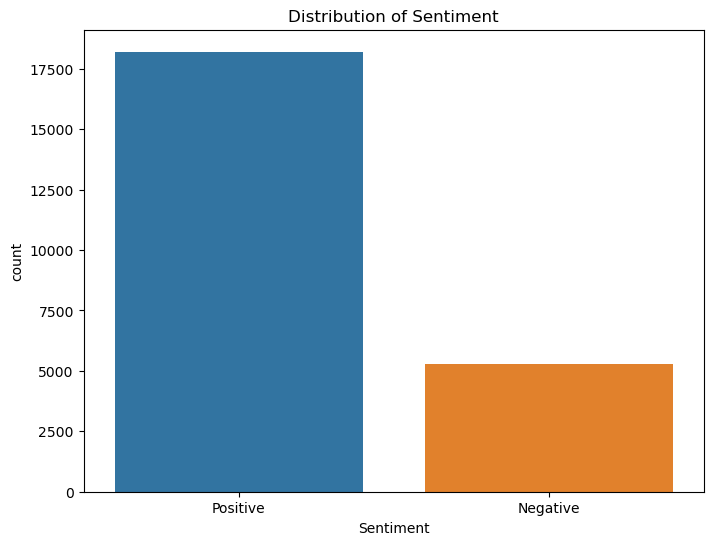

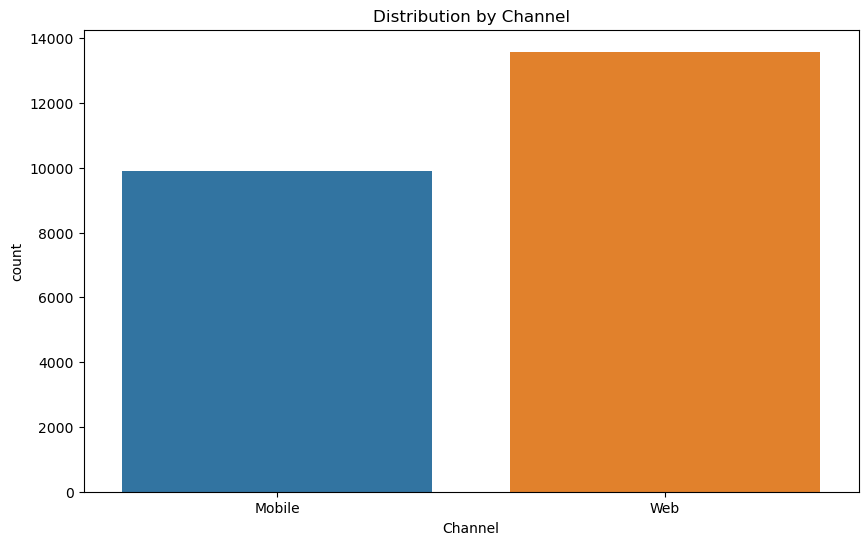

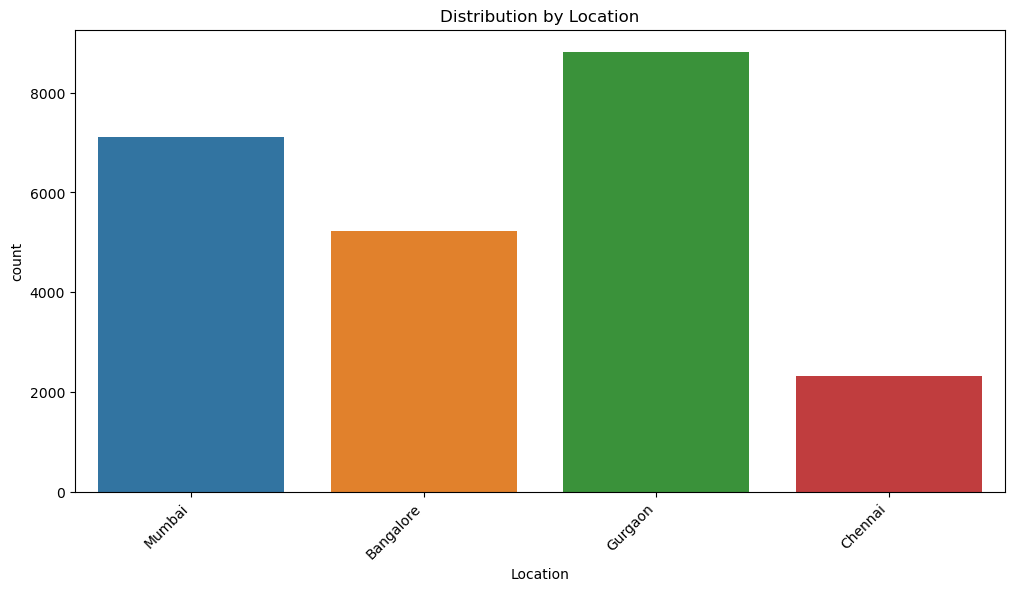

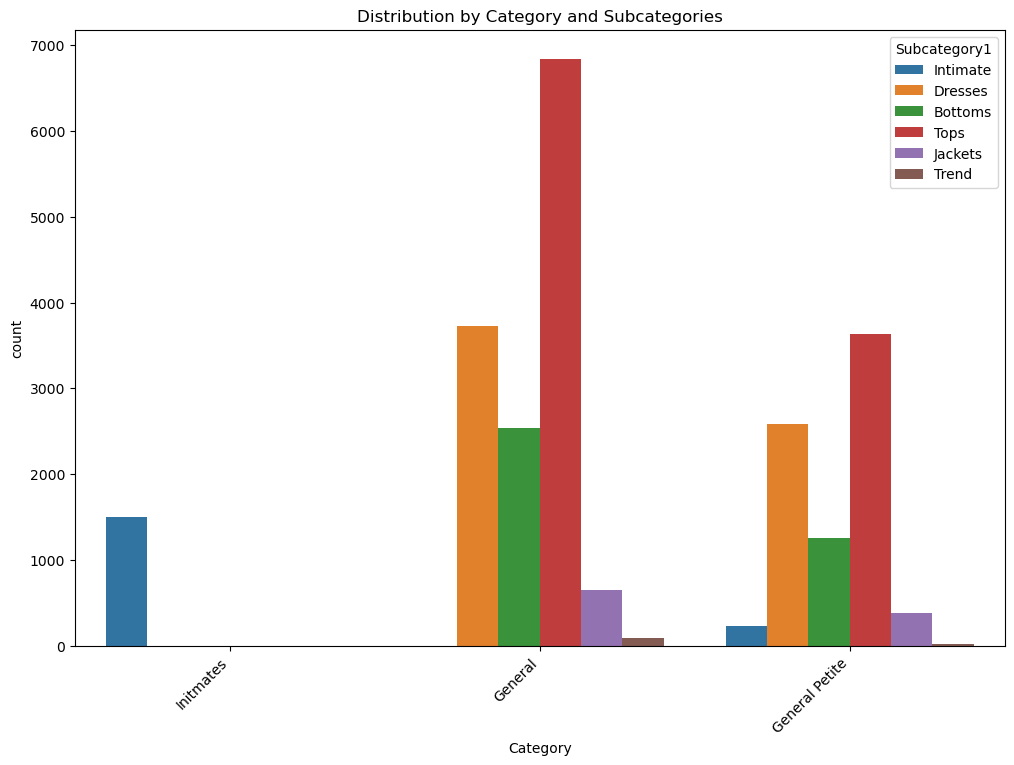

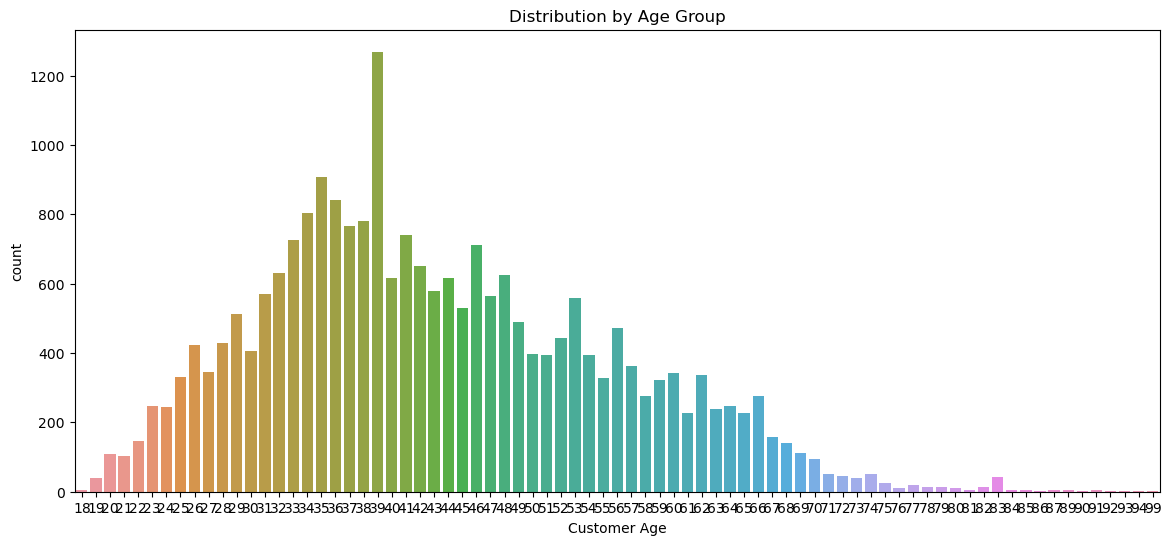

In [18]:
# Assuming 4 and 5 ratings as positive, and 1, 2, 3 as negative
df['Sentiment'] = np.where(df['Rating'] >= 4, 'Positive', 'Negative')

# Visualize Sentiment distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='Sentiment', data=df)
plt.title('Distribution of Sentiment')
plt.show()

# Visualize distribution by Channel
plt.figure(figsize=(10, 6))
sns.countplot(x='Channel', data=df)
plt.title('Distribution by Channel')
plt.show()

# Visualize distribution by Location
plt.figure(figsize=(12, 6))
sns.countplot(x='Location', data=df)
plt.title('Distribution by Location')
plt.xticks(rotation=45, ha='right')
plt.show()

# Visualize distribution by Category and Subcategories
plt.figure(figsize=(12, 8))
sns.countplot(x='Category', hue='Subcategory1', data=df)
plt.title('Distribution by Category and Subcategories')
plt.xticks(rotation=45, ha='right')
plt.show()

# Visualize distribution by Age Group
plt.figure(figsize=(14, 6))  # Increase figure size for better visualization
sns.countplot(x='Customer Age', data=df)  # Update 'Age' to 'Customer Age'
plt.title('Distribution by Age Group')
plt.show()


# Predictive Analysis
## Topic Mining using Latent Dirichlet Allocation (LDA)

In [19]:
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import CountVectorizer

# Topic Mining using LDA
vectorizer_lda = CountVectorizer(stop_words='english')
X_lda = vectorizer_lda.fit_transform(df['Review Text'])

lda = LatentDirichletAllocation(n_components=5, random_state=42)
lda.fit(X_lda)

# Display the top 10 words for each topic
feature_names_lda = vectorizer_lda.get_feature_names_out()

for topic_idx, topic in enumerate(lda.components_):
    top_keywords_idx = topic.argsort()[:-11:-1]
    top_keywords = [feature_names_lda[i] for i in top_keywords_idx]
    print(f"Topic #{topic_idx+1}: {', '.join(top_keywords)}")


Topic #1: size, small, dress, fit, large, wear, medium, ordered, usually, petite
Topic #2: _x000d_, like, color, sweater, ordered, fabric, shirt, soft, really, fit
Topic #3: dress, love, wear, great, perfect, comfortable, flattering, soft, summer, compliments
Topic #4: love, jeans, great, pants, fit, size, color, like, bought, look
Topic #5: dress, like, just, look, fabric, really, looked, didn, fit, love


## Classification Model for Predicting Recommendations


In [20]:
# Classification model for predicting recommendations
X_train, X_test, y_train, y_test = train_test_split(df['Review Text'], df['Recommend Flag'], test_size=0.2, random_state=42)

vectorizer = TfidfVectorizer(stop_words='english')
X_train_vectorized = vectorizer.fit_transform(X_train.astype(str))
X_test_vectorized = vectorizer.transform(X_test.astype(str))

classifier = RandomForestClassifier(random_state=42)
classifier.fit(X_train_vectorized, y_train)

# Predictions
predictions = classifier.predict(X_test_vectorized)

# Evaluate the model
print("\nClassification Report:")
print(classification_report(y_test, predictions))



Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.24      0.38       851
           1       0.86      0.99      0.92      3847

    accuracy                           0.86      4698
   macro avg       0.86      0.62      0.65      4698
weighted avg       0.86      0.86      0.82      4698



## Classification Model for Predicting Ratings


In [21]:
# Predicting Ratings based on Reviews
X_train_rating, X_test_rating, y_train_rating, y_test_rating = train_test_split(df['Review Text'], df['Rating'], test_size=0.2, random_state=42)

classifier_rating = RandomForestClassifier(random_state=42)
classifier_rating.fit(X_train_vectorized, y_train_rating)

# Predictions for Ratings
predictions_rating = classifier_rating.predict(X_test_vectorized)

# Evaluate the model for Ratings
print("\nClassification Report for Ratings:")
print(classification_report(y_test_rating, predictions_rating))



Classification Report for Ratings:
              precision    recall  f1-score   support

           1       0.45      0.03      0.06       153
           2       0.44      0.03      0.06       317
           3       0.45      0.14      0.21       620
           4       0.32      0.04      0.08      1017
           5       0.59      0.99      0.74      2591

    accuracy                           0.58      4698
   macro avg       0.45      0.25      0.23      4698
weighted avg       0.50      0.58      0.46      4698

